# PROBLEM SET #4: 
# NEURAL NETWORKS PART I

In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from function_approximator import FunctionApproximator
import pandas as pd

/Users/arp504/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### General note about this problem set:

Neural networks can be a bit of a pain to train well. It takes some trial and error. You need to experimentally try different settings in order to get good performance: a different number of iterations, a different number of hidden units, a different learning rate, et cetera. The point of this problem set is not for you to spend 5000 hours tweaking each and every neural network to get the best possible performance (especially since we're not bothering to do a correct training/test/validation split). Nevertheless, some effort should be made to choose well-performing parameters. Doing so should help demystify neural networks somewhat and help you get past seeing them as magical black boxes. Also the fact that neural networks can (potentially) be tedious to train should be kept in mind before you decide to use them for a given task.

# Problem 1 (20%)

Consider approximating the following two functions defined on the unit interval $[0,1]$:

$$\begin{equation}
f_1(x) = {\rm exp}\left(1.1 \; {\rm sin}^2(2.3 \;x^3) + {\rm tanh}(x^2/3.7)\right)
\end{equation}$$

$$\begin{equation}
f_2(x) = {\rm exp}\left(1.1 \; {\rm sin}^2(2.3 \;x^3)\right)
\end{equation}$$

For each function $f_i(x)$ consider the 101-element training set 

$$\begin{equation}
\mathcal{D}_i = \left\{ x_j, y_j \right\} = \left\{ \frac{j}{100}, \;f_i\left(\frac{j}{100}\right) \right\} \qquad \rm{for} \qquad j=0,1,2,...,99,100
\end{equation}$$
    
__(a)__ How many hidden units do you need to get a MSE (mean squared error) for $\mathcal{D}_1$ below 0.1? Below 0.001? Below 0.0001?


In [2]:
#Defining Functions and a Find Function that trains a model an gets the
def f1(x):
    return np.exp(1.1 * pow(np.sin(2.3 * pow(x,3)),2)+np.tanh(pow(x,2)/3.7))
def f2(x):
    return np.exp(1.1 * pow(np.sin(2.3 * pow(x,3)),2))
def find(goal_mse,x,y,init_guess=1,tries=10):
    i = 1
    while True:
        fa = FunctionApproximator(n_out=1, n_hidden = init_guess - 1 + i)
        fa.train(x,y, learning_rate = 0.01, n_epochs = 1000000, report_frequency=10000000)
        y_pred = fa.get_y_pred()
        mse = np.mean(pow(y - y_pred.reshape(101),2))
        if i > tries:
            break
        if mse < goal_mse:
            print ("For a goal of mse below {0}, it is necessary {1} units hidden, with mse of {2}".format(goal_mse,init_guess - 1 + i,mse) )
            break
        else:
            print ("Now number: {0} with mse={1}".format(init_guess - 1 + i,mse))
            i = i + 1
            

In [3]:
#Creating 101 elements between 0.0 and 1.0
x = np.linspace(0.0,1.0,101)
y1 = f1(x)
y2 = f2(x)
x = x.reshape(101,1)

In [4]:
#For 0.1
find(0.1,x,y1)

For a goal of mse below 0.1, it is necessary 1 units hidden, with mse of 0.0378073347908


In [5]:
#For 0.001
find(0.001,x,y1)

Now number: 1 with mse=0.0378073347908
For a goal of mse below 0.001, it is necessary 2 units hidden, with mse of 0.000263054854808


In [6]:
#For 0.0001
find(0.0001,x,y1)

Now number: 1 with mse=0.0378073347908
Now number: 2 with mse=0.000263054854808
Now number: 3 with mse=0.000174126399981
Now number: 4 with mse=0.000168980533201
Now number: 5 with mse=0.000186621529532
Now number: 6 with mse=0.000169542385038
Now number: 7 with mse=0.000196872903672
Now number: 8 with mse=0.000139890179968
Now number: 9 with mse=0.000132567873944
For a goal of mse below 0.0001, it is necessary 10 units hidden, with mse of 9.02210455975e-05



__(b)__ How many hidden units do you need to get a MSE for $\mathcal{D}_2$ below 0.1? Below 0.001? Below 0.0001?

In [7]:
#For 0.1
find(0.1,x,y2)

For a goal of mse below 0.1, it is necessary 1 units hidden, with mse of 0.028845013673


In [8]:
#For 0.001
find(0.001,x,y2)

Now number: 1 with mse=0.028845013673
For a goal of mse below 0.001, it is necessary 2 units hidden, with mse of 0.000115052276208


In [9]:
#For 0.0001
find(0.0001,x,y2,init_guess=90,tries=3)

Now number: 90 with mse=0.00022987326408
Now number: 91 with mse=0.000230501477291
Now number: 92 with mse=0.000230414308867


In [10]:
#It is very hard to find for D2 below 0.0001

# Problem 2 (45%)

In the lecture notebook we noted that without regularization a neural network might take on weights with extreme values. In this problem we want to explore a bit more how/when this might happen. We are again considering function approximation on the unit interval, as above. We want to consider a function $f(x)$ that also has its range contained in the unit interval as well, i.e.

$$\begin{equation}
f: [0,1] \to [0,1]
\end{equation}$$

Your goal is to construct a medium-sized dataset $\mathcal{D}$ [say with $\mathcal{O}(10-100)$ elements] that leads to a neural network with extreme weights in the weight matrix $\bf W^{(1)}$ after training. So you need to explicitly construct a dataset of the form

$$\begin{equation}
\mathcal{D} = \left\{ x_j, y_j \right\} 
\end{equation}$$

where $x_j, y_j \in [0,1]$ for all $x_j, y_j$. Choose the number of hidden units as you wish. 

_Specifically your goal is to choose $\mathcal{D}$ such that the largest element of $\bf W^{(1)}$ is larger than 25 in absolute value._ (If you can't reach 25 do the best you can)

__(a)__ Construct the dataset and print it out. 

_Tips: Consider different numbers of hidden units. Consider datasets that have some of the $x_j$ very close together. Consider datasets where the implicit function $f(x)$ behind $y_j = f(x_j)$ varies rapidly as a function of $x$. Make sure you train long enough. (These are not necessary conditions but they might help you achieve your goal)_

In [11]:
np.random.seed(2016)

In [12]:
#Number of Elements
#n = np.random.random_integers(10,high=100,size=1)[0]
n=100
print (n)

100


In [13]:
x = np.linspace(0,1,n)
#x = 1 / (1+np.exp(25 * (y-1/2)))
y = np.sin(7 * np.pi * x / 2)**2
print ("x=",x)
print ("y=",y)

x= [ 0.          0.01010101  0.02020202  0.03030303  0.04040404  0.05050505
  0.06060606  0.07070707  0.08080808  0.09090909  0.1010101   0.11111111
  0.12121212  0.13131313  0.14141414  0.15151515  0.16161616  0.17171717
  0.18181818  0.19191919  0.2020202   0.21212121  0.22222222  0.23232323
  0.24242424  0.25252525  0.26262626  0.27272727  0.28282828  0.29292929
  0.3030303   0.31313131  0.32323232  0.33333333  0.34343434  0.35353535
  0.36363636  0.37373737  0.38383838  0.39393939  0.4040404   0.41414141
  0.42424242  0.43434343  0.44444444  0.45454545  0.46464646  0.47474747
  0.48484848  0.49494949  0.50505051  0.51515152  0.52525253  0.53535354
  0.54545455  0.55555556  0.56565657  0.57575758  0.58585859  0.5959596
  0.60606061  0.61616162  0.62626263  0.63636364  0.64646465  0.65656566
  0.66666667  0.67676768  0.68686869  0.6969697   0.70707071  0.71717172
  0.72727273  0.73737374  0.74747475  0.75757576  0.76767677  0.77777778
  0.78787879  0.7979798   0.80808081  0.81818182 

__(b)__ Train the neural network and plot the resulting dataset and the function approximation yielded by the neural network.

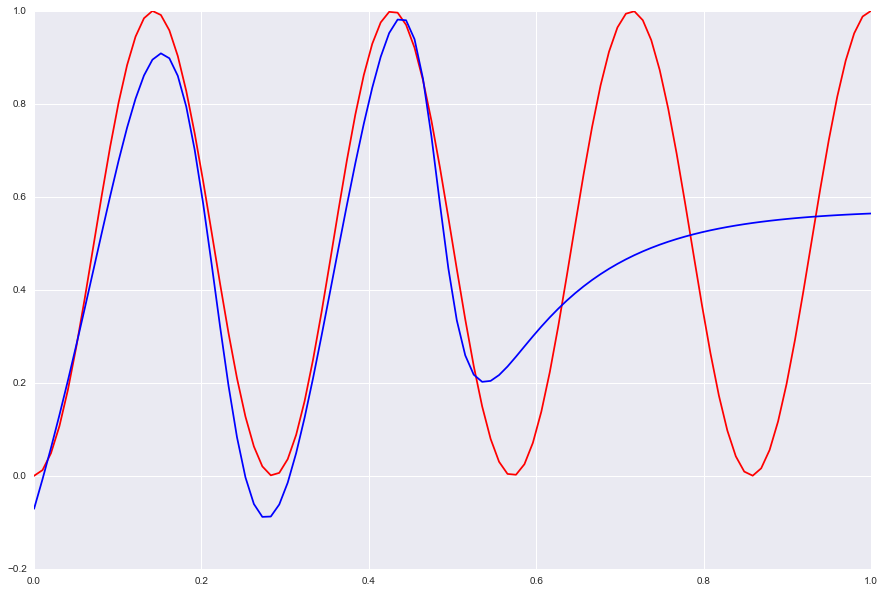

In [14]:
x = x.reshape((n,1))
fa = FunctionApproximator(n_out=1, n_hidden=3)
fa.train(x, y, learning_rate=0.2, n_epochs=1000000, report_frequency=2000000)
y_pred = fa.get_y_pred()
plt.figure(figsize=(15,10))
plt.plot(x,y,c='Red')
plt.plot(x, y_pred,c='Blue');

__(c)__ Use the get_weights function to demonstrate that your $\bf W^{(1)}$ does in fact have extreme weights. What's the largest weight in absolute value?

[ _to access the weights after training use something like_: [w1, b1, w2, b2] = fa.get_weights() ]

In [15]:
ws = fa.get_weights()[0][0]
maxW= max(np.abs(ws))
print ("Maximum absolute value:",maxW)

Maximum absolute value: 26.0478822776


__(d)__ Explain the properties of your dataset that led to these extreme weights. 

Extreme and rapidly changes usually leads to big coefficients (weights)

__(e)__ Add a regularizer to your neural network and retrain on the same dataset. Plot the new function approximation and demonstrate that the weights become less extreme.


Maximum absolute value: 0.127205196016


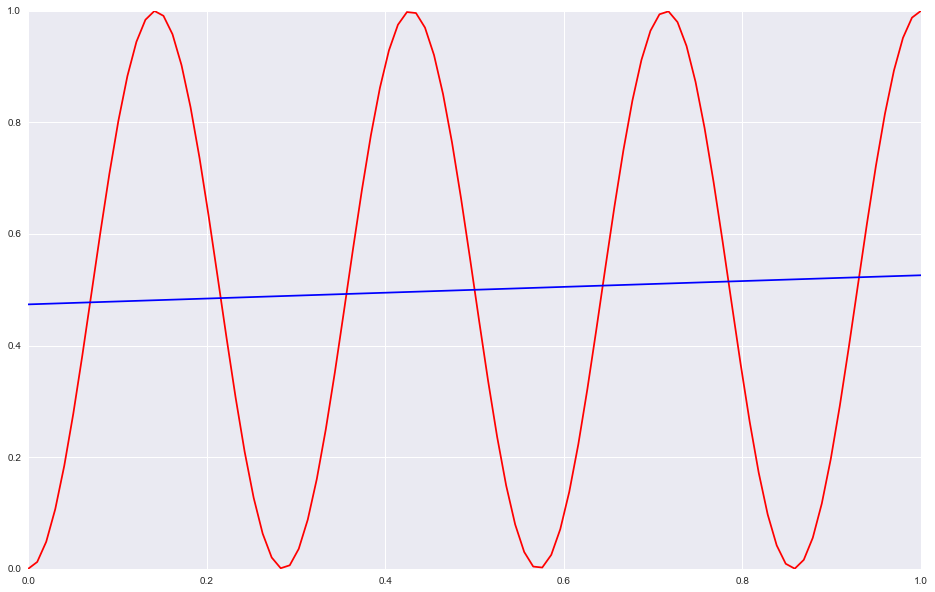

In [16]:
fa.train(x, y, learning_rate=0.2, n_epochs=1000000, report_frequency=2000000, lambda_l2=0.0001)
ws = fa.get_weights()[0][0]
maxW= max(np.abs(ws))
print ("Maximum absolute value:",maxW)
y_pred = fa.get_y_pred()

plt.figure(figsize=(16,10))
plt.plot(x,y,c='Red')
plt.plot(x, y_pred,c='Blue');

<br>
<br>
<br>
# Problem 3 (35%)

In the lecture notebook we used a 2-layer neural network (1 hidden layer) to classify the scikit learn "moon data"

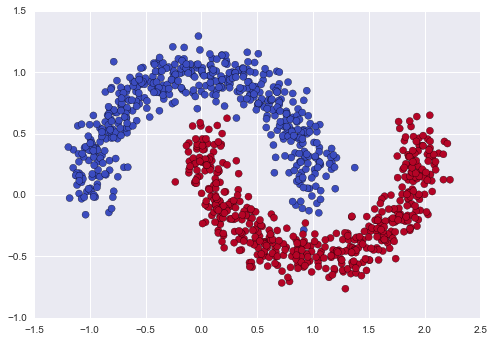

In [17]:
### use the exact dataset below for this problem
from sklearn.datasets import make_moons
np.random.seed(0)
X, Y = make_moons(1000, noise=0.11)
plt.scatter(X[:,0], X[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

In order to get decent separation between the red and blue points we needed several hidden units. Here we want to see what kind of classification error we can get if we _first process the data with Kernel PCA_.

__(a)__ When you use the 2-layer neural classifier on this dataset (just like in the lecture notebook) what's the best test performance you can get when using no more than 10 hidden units? Plot the resulting decision boundary. (Note that we just set the test set equal to the training set)

using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 2000, minibatch 1/1, validation error 0.400000 %
epoch 2000, minibatch 1/1, test error of best model 0.400000 %
epoch 4000, minibatch 1/1, validation error 0.300000 %
epoch 4000, minibatch 1/1, test error of best model 0.300000 %
epoch 6000, minibatch 1/1, validation error 0.300000 %
epoch 8000, minibatch 1/1, validation error 0.200000 %
epoch 8000, minibatch 1/1, test error of best model 0.200000 %
epoch 10000, minibatch 1/1, validation error 0.200000 %
epoch 12000, minibatch 1/1, validation error 0.200000 %
epoch 14000, minibatch 1/1, validation error 0.200000 %
epoch 16000, minibatch 1/1, validation error 0.200000 %
epoch 18000, minibatch 1/1, validation error 0.200000 %
epoch 20000, minibatch 1/1, validation error 0.200000 %
epoch 22000, minibatch 1/1, validation error 0.200000 %
epoch 24000, minibatch 1/1, validation error 0.200000 %
epoch 26000, minibatch 

The code for file neural_classifier.pyc ran for 8.7s


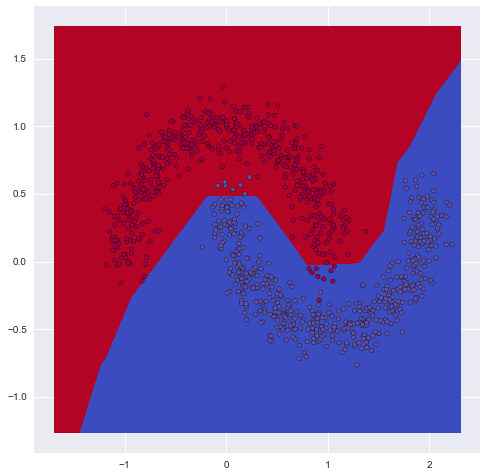

In [18]:
from neural_classifier import neural_classifier

nc = neural_classifier()
nc.train(learning_rate=0.2, n_epochs=40000,
          X_train=X, Y_train=Y, batch_size=len(Y), print_frequency=2000,
          n_in=2, n_out=2, n_hidden=4, n_layers=2)
#with 3 hidden it jumps to more than 10%
nc.plot_decision_boundary(plt, X, Y)

__(b)__ What kind of classification performance can you get if you _first_ transform the data using Kernel PCA and _then_ run a 2-layer neural classifier on the transformed data? What's the minimum number of hidden units you need to outperform the classifier in part (a)? What kernel and kernel settings did you use? How well can you do if you only use a _single_ hidden unit in the neural network? _Note: you needn't and/or may not want to use all the components of the kernel transformation._

In [26]:
from sklearn.decomposition import KernelPCA

n_comp = 4
kpca = KernelPCA(n_components=n_comp, kernel="poly", degree=3)
X_pred = kpca.fit_transform(X)

# Make sure training gets < .2%
nc = neural_classifier()
nc.train(learning_rate=0.5, n_epochs=40000,
          X_train=X_pred, Y_train=Y, batch_size=len(Y), print_frequency=2000,
          n_in=n_comp, n_out=2, n_hidden=2, n_layers=2)

#nc.plot_decision_boundary(plt, X_pred, Y)

using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 2000, minibatch 1/1, validation error 0.400000 %
epoch 2000, minibatch 1/1, test error of best model 0.400000 %
epoch 4000, minibatch 1/1, validation error 0.200000 %
epoch 4000, minibatch 1/1, test error of best model 0.200000 %
epoch 6000, minibatch 1/1, validation error 0.100000 %
epoch 6000, minibatch 1/1, test error of best model 0.100000 %
epoch 8000, minibatch 1/1, validation error 0.100000 %
epoch 10000, minibatch 1/1, validation error 0.100000 %
epoch 12000, minibatch 1/1, validation error 0.100000 %
epoch 14000, minibatch 1/1, validation error 0.100000 %
epoch 16000, minibatch 1/1, validation error 0.100000 %
epoch 18000, minibatch 1/1, validation error 0.100000 %
epoch 20000, minibatch 1/1, validation error 0.100000 %
epoch 22000, minibatch 1/1, validation error 0.100000 %
Optimization complete with best validation score of 0.100000 %,with test perfor

The code for file neural_classifier.pyc ran for 5.0s


In [27]:
#For 1 hidden:
nc = neural_classifier()
nc.train(learning_rate=0.5, n_epochs=40000,
          X_train=X_pred, Y_train=Y, batch_size=len(Y), print_frequency=2000,
          n_in=n_comp, n_out=2, n_hidden=1, n_layers=2)

using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 2000, minibatch 1/1, validation error 13.400000 %
epoch 2000, minibatch 1/1, test error of best model 13.400000 %
epoch 4000, minibatch 1/1, validation error 13.500000 %
epoch 6000, minibatch 1/1, validation error 13.600000 %
Optimization complete with best validation score of 13.400000 %,with test performance 13.400000 %
The code ran for 7997 epochs, with 5688.105678 epochs/sec


The code for file neural_classifier.pyc ran for 1.4s


#Best is 13.4% for 1 hidden